In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving hospital_data.csv to hospital_data.csv


{'hospital_data.csv': b'\xef\xbb\xbfSL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,RR,TOTAL COST TO HOSPITAL \r\n1,58,M,MARRIED,other,49,160,118,32,660293\r\n2,59,M,MARRIED,CAD,41,155,78,28,809130\r\n3,82,M,MARRIED,CAD,47,164,100,20,362231\r\n4,46,M,MARRIED,CAD,80,173,122,24,629990\r\n5,60,M,MARRIED,CAD,58,175,72,18,444876\r\n6,75,M,MARRIED,CAD,45,140,130,42,372357\r\n7,73,M,MARRIED,CAD,60,170,108,24,887350\r\n8,71,M,MARRIED,CAD,44,164,60,22,389827\r\n9,72,M,MARRIED,CAD,72,174,95,25,437529.07\r\n10,61,M,MARRIED,CAD,77,175,66,22,364222\r\n11,61,M,MARRIED,CAD,64,170,99,24,514524\r\n12,45,F,MARRIED,other,50,151,60,19,539976\r\n13,40,M,MARRIED,RHD,71,165,100,22,711616\r\n14,64,M,MARRIED,None,56,168,105,22,420040\r\n15,68,F,UNMARRIED,CAD,51,123,66,20,495968.7\r\n16,78,F,MARRIED,CAD,70,154,63,20,157763\r\n17,65,M,MARRIED,CAD,65,140,93,18,501897\r\n18,59,F,MARRIED,RHD,47,150,60,24,343984\r\n19,76,M,MARRIED,CAD,67,172,80,20,449395\r\n20,47,M,MARRIED,CAD,59,

In [ ]:
data = pd.read_csv('hospital_data.csv')
data.head()

,SL.,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS -CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,RR,TOTAL COST TO HOSPITAL
0,1,58.0,M,MARRIED,other,49,160,118,32,660293.0
1,2,59.0,M,MARRIED,CAD,41,155,78,28,809130.0
2,3,82.0,M,MARRIED,CAD,47,164,100,20,362231.0
3,4,46.0,M,MARRIED,CAD,80,173,122,24,629990.0
4,5,60.0,M,MARRIED,CAD,58,175,72,18,444876.0


In [ ]:
print("Columns:", data.columns)

Columns: Index(['SL.', 'AGE', 'GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE',
       'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'RR',
       'TOTAL COST TO HOSPITAL '],
      dtype='object')


In [ ]:
X = data.drop(columns=['SL.', 'TOTAL COST TO HOSPITAL '])
y = data['TOTAL COST TO HOSPITAL ']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['AGE', 'BODY WEIGHT', 'BODY HEIGHT', 'HR PULSE', 'RR']

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

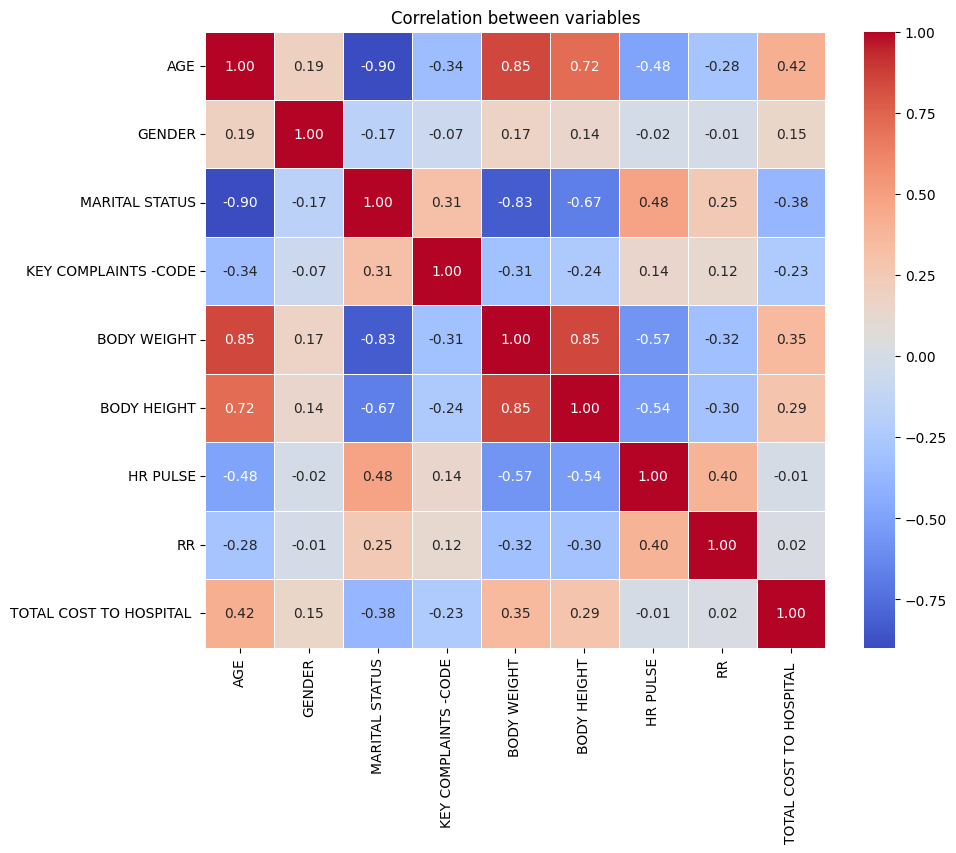

In [ ]:
import seaborn as sns

encoded_data = pd.concat([X, y], axis=1)
corr_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation between variables')
plt.show()

In [ ]:
selected_features = corr_matrix['TOTAL COST TO HOSPITAL '][corr_matrix['TOTAL COST TO HOSPITAL '].abs() > 0.2].index.tolist()
selected_features.remove('TOTAL COST TO HOSPITAL ')
X = X[selected_features]

In [ ]:
selected_features

['AGE', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE', 'BODY WEIGHT', 'BODY HEIGHT']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

y_mean = y_test.mean()
ssr = ((y_pred - y_mean) ** 2).sum()

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Sum Squared Regression (SSR):", ssr)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Sum Squared Regression (SSR): 151737259615.80298
Mean Squared Error (MSE): 16166184468.35565
R-squared (R2): 0.14993064125981437


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_mean = y_test.mean()
ssr = ((y_pred_rf - y_mean) ** 2).sum()

mse = mean_squared_error(y_test, y_pred_rf)

r2 = r2_score(y_test, y_pred_rf)

print("Sum Squared Regression (SSR):", ssr)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Sum Squared Regression (SSR): 232566779564.98947
Mean Squared Error (MSE): 17139109787.405476
R-squared (R2): 0.09877113583132657


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict total cost to hospital on the testing set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Mean Squared Error:", mse_gb)

Gradient Boosting Mean Squared Error: 18772292985.03961


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search Cross-Validation to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions and evaluate the model
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best Random Forest Mean Squared Error:", mse)


Best Random Forest Mean Squared Error: 15718636740.421925


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', max_iter=500, random_state=42)

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Predict total cost to hospital on the testing set
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print("MLPRegressor Mean Squared Error:", mse_mlp)


MLPRegressor Mean Squared Error: 65013608260.50668


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/College Work/MCA/ML/hospital_data.xlsx', sheet_name='DAD_MD_Training')

# Data preprocessing
# Drop rows with missing values
data.dropna(inplace=True)

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['GENDER', 'MARITAL STATUS', 'KEY COMPLAINTS -CODE'])

# Split dataset into features and target variable
X = data_encoded.drop('TOTAL COST TO HOSPITAL ', axis=1)
y = data_encoded['TOTAL COST TO HOSPITAL ']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Model selection and tuning
# Define RandomForestRegressor and its hyperparameters for grid search
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Model evaluation on validation set
y_pred_val = best_rf_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
print("Validation Mean Squared Error:", mse_val)

# Model evaluation on test set
y_pred_test = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error:", mse_test)

# Optionally, deploy the model and monitor its performance in production


Validation Mean Squared Error: 4288880351.5785537
Test Mean Squared Error: 3635572350.602623


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Define models for grid search
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('MLP Regressor', MLPRegressor(random_state=42))
]

# Define hyperparameters for grid search
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(100,), (50, 100), (100, 100)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    }
}

# Perform grid search for each model
best_models = {}
for name, model in models:
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_val, y_train_val)
    best_models[name] = grid_search.best_estimator_

# Model evaluation on validation set
for name, model in best_models.items():
    y_pred_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    print(f"{name} Validation Mean Squared Error:", mse_val)

# Select the best model based on validation performance
best_model_name = min(best_models, key=lambda x: mean_squared_error(y_val, best_models[x].predict(X_val)))
best_model = best_models[best_model_name]

# Model evaluation on test set
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"Best Model ({best_model_name}) Test Mean Squared Error:", mse_test)


Linear Regression Validation Mean Squared Error: 8410859313.469422
Decision Tree Validation Mean Squared Error: 2200145726.413914
Random Forest Validation Mean Squared Error: 4288880351.5785537
Gradient Boosting Validation Mean Squared Error: 216609519.15690666
MLP Regressor Validation Mean Squared Error: 79143480767.74146
Best Model (Gradient Boosting) Test Mean Squared Error: 3151544070.06759


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
